In [25]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/positive-and-negative-test-cases/Labelled_Test_Cases.csv


In [26]:
# Specify the correct encoding when reading the CSV file
# df = pd.read_csv('/kaggle/input/positive-and-negative-test-cases/Labelled_Test_Cases.csv')  
df = pd.read_csv('/kaggle/input/positive-and-negative-test-cases/Labelled_Test_Cases.csv', encoding='latin1') 
# Try 'ISO-8859-1' or 'utf-16' if needed

In [27]:
# Shows the amount of rows and columns in the dataframe
df.shape

(3000, 5)

In [28]:
#shows the first 10 lines of data
df.head(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,Neg,A customer cannot stream a movie if they purc...,NaN,NaN,NaN
1,Neg,A database management system such as Oracle D...,NaN,NaN,NaN
2,Neg,All credit card information will be not be se...,NaN,NaN,NaN
3,Neg,Not all movies shall be streamed on demand at ...,NaN,NaN,NaN
4,Neg,An employee is unable to successfully use the...,NaN,NaN,NaN
5,Neg,Any interface between a user and the automate...,NaN,NaN,NaN
6,Neg,"Table constraints like a Primary key, Foreign ...",NaN,NaN,NaN
7,Neg,File selection dialog does not show supported ...,NaN,NaN,NaN
8,Neg,Field length shown to the user on the page and...,NaN,NaN,NaN
9,Neg,Cancel button functionality is not working in ...,NaN,NaN,NaN


In [29]:
# Keep only the first and second columns
columns_to_keep = ['v1', 'v2']
df = df[columns_to_keep]

In [30]:
# Checking null values(optional)
df.isnull().sum()

v1    0
v2    0
dtype: int64

In [31]:
# To see amount per label(optional) 
df.v1.value_counts()

v1
Pos    2100
Neg     900
Name: count, dtype: int64

In [32]:
# Model Development

# Import necessary libraries
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Define classifiers
classifiers = {
    'Multinomial Naive Bayes': MultinomialNB(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(),
    'Logistic Regression': LogisticRegression()
}

# Iterate through classifiers
for name, clf in classifiers.items():
    # Build a corpus from the 'Test Case/v2' column
    corpus = df['v2'].tolist()

    # Create a Bag-of-Words model using CountVectorizer(to convert the text data into numerical features) 
    # and TfidfTransformer(commonly used to normalize and scale the term frequencies)
    vectorizer = CountVectorizer()
    transformer = TfidfTransformer()
    classifier = clf

    # Create a pipeline with a text feature vectorizer (CountVectorizer), TfidfTransformer, and the classifier
    model = Pipeline([
        ('vectorizer', vectorizer),
        ('transformer', transformer),
        ('classifier', classifier)
    ])

    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(corpus, df['v1'], test_size=0.3, random_state=42)

    # Train the model
    model.fit(X_train, y_train)

    # Make predictions on the test set
    predictions = model.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, predictions)
    report = classification_report(y_test, predictions)

    print(f'\nResults for {name}:')
    print(f'Accuracy: {accuracy}')
    print('Classification Report:\n', report)



Results for Multinomial Naive Bayes:
Accuracy: 0.8
Classification Report:
               precision    recall  f1-score   support

         Neg       0.89      0.43      0.58       288
         Pos       0.78      0.97      0.87       612

    accuracy                           0.80       900
   macro avg       0.83      0.70      0.72       900
weighted avg       0.82      0.80      0.78       900


Results for Decision Tree:
Accuracy: 0.9277777777777778
Classification Report:
               precision    recall  f1-score   support

         Neg       0.93      0.84      0.88       288
         Pos       0.93      0.97      0.95       612

    accuracy                           0.93       900
   macro avg       0.93      0.90      0.91       900
weighted avg       0.93      0.93      0.93       900


Results for Random Forest:
Accuracy: 0.91
Classification Report:
               precision    recall  f1-score   support

         Neg       0.93      0.77      0.85       288
         Pos 

In [33]:
# Use Decision Tree 

classifier = DecisionTreeClassifier()

# Create a pipeline with a text feature vectorizer (CountVectorizer), TfidfTransformer, and the Decision Tree classifier
model = Pipeline([
    ('vectorizer', vectorizer),
    ('transformer', transformer),
    ('classifier', classifier)
])

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(corpus, df['v1'], test_size=0.3, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Save the trained model to a file
# Use joblib to save and load the model
import joblib  
joblib.dump(model, 'decision_tree_model.pkl')

['decision_tree_model.pkl']

In [34]:
# # Later on(if you want to build an interface), when you want to use the model for predictions:

# # Load the trained model from the file
# loaded_model = joblib.load('decision_tree_model.pkl')

# # Input a new test case
# single_test_case = [input("Enter your test case: ")]

# # Make predictions using the loaded model
# prediction = loaded_model.predict(single_test_case)

# # Display the result
# print(f'Test Case: {single_test_case[0]}')
# print(f'Prediction: {prediction[0]}')


In [35]:
# # Later on(if you want to build an interface), when you want to use the model for predictions:

# # Load the trained model from the file
# loaded_model = joblib.load('decision_tree_model.pkl')

# # Input a new test case
# single_test_case = [input("Enter your test case: ")]

# # Make predictions using the loaded model
# prediction = loaded_model.predict(single_test_case)

# # Display the result
# print(f'Test Case: {single_test_case[0]}')
# print(f'Prediction: {prediction[0]}')

                     Model  Accuracy  Precision    Recall  F1-Score
0  Multinomial Naive Bayes  0.788333   0.803924  0.788333  0.763910
1            Decision Tree  0.928333   0.928159  0.928333  0.927579
2            Random Forest  0.913333   0.915812  0.913333  0.911022
3   Support Vector Machine  0.880000   0.891122  0.880000  0.873158
4      Logistic Regression  0.885000   0.897570  0.885000  0.878300
5        Gradient Boosting  0.936667   0.939411  0.936667  0.935210


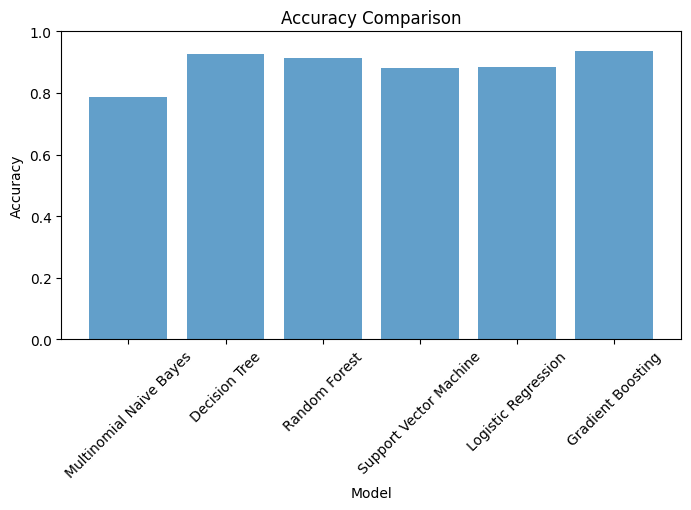

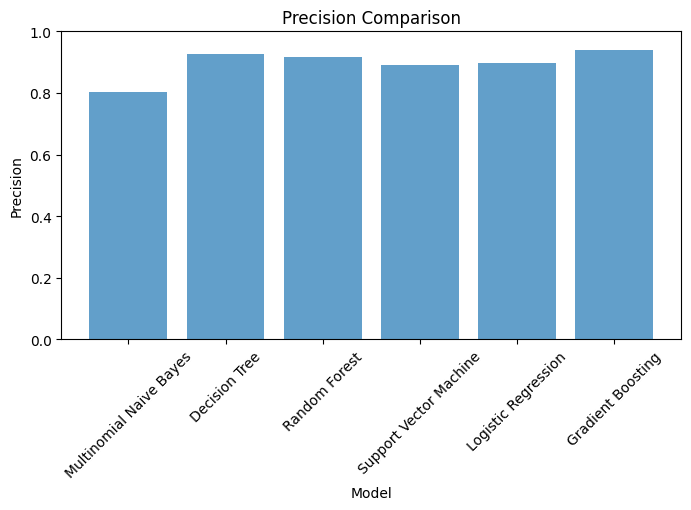

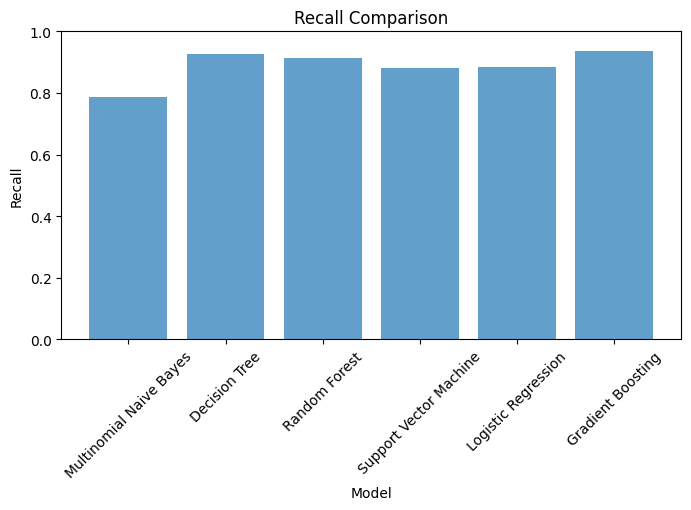

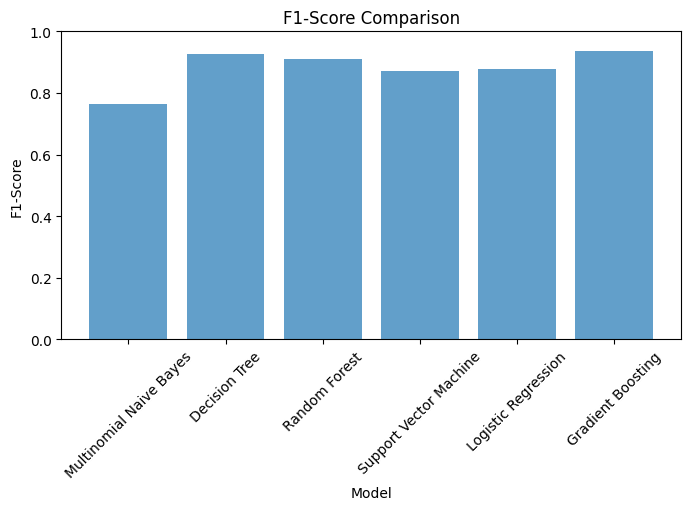

In [36]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load the dataset
df = pd.read_csv('/kaggle/input/positive-and-negative-test-cases/Labelled_Test_Cases.csv', encoding='latin1')

# Rename columns for clarity
df = df.rename(columns={'v1': 'Label', 'v2': 'Text'})

# Encode the labels ('Neg' -> 0, 'Pos' -> 1)
df['Label'] = df['Label'].map({'Neg': 0, 'Pos': 1})

# Define models
models = {
    "Multinomial Naive Bayes": MultinomialNB(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machine": SVC(),
    "Logistic Regression": LogisticRegression(),
    "Gradient Boosting": GradientBoostingClassifier()  # Adding Gradient Boosting
}

# Store results for each model
results = []

# Iterate through each model
for model_name, model in models.items():
    # Create a text classification pipeline
    pipeline = Pipeline([
        ('vectorizer', CountVectorizer()),          # Convert text to numerical data
        ('tfidf', TfidfTransformer()),              # Normalize term frequencies
        ('classifier', model)                       # Add the classifier
    ])
    
    # Split dataset
    X_train, X_test, y_train, y_test = train_test_split(df['Text'], df['Label'], test_size=0.2, random_state=42)
    
    # Train the model
    pipeline.fit(X_train, y_train)
    
    # Make predictions
    y_pred = pipeline.predict(X_test)
    
    # Evaluate performance
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    results.append({
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1
    })

# Create a DataFrame for results
results_df = pd.DataFrame(results)
print(results_df)

# Visualize the comparison
import matplotlib.pyplot as plt

metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
for metric in metrics:
    plt.figure(figsize=(8, 4))
    plt.bar(results_df['Model'], results_df[metric], alpha=0.7)
    plt.title(f'{metric} Comparison')
    plt.ylabel(metric)
    plt.xlabel('Model')
    plt.xticks(rotation=45)
    plt.ylim(0, 1)
    plt.show()
